# Eigenproblem for Quantum Optical Models: Driven Jaynes Cummings Model

This Notebook contains numerical routines that support the findings in arxiv:

## Jaynes Cummings Model with the atom being driven

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import linalg as LA
try:
    import matplotlib.pyplot as plt
except ImportError:
    pass
from matplotlib.pyplot import *

### Fitting function

In [2]:
def func(x, a, b, c):
    return a * ((-b)**x) + c

### Parameters

In [3]:
t_intra = -1.0
t_inter = -2.0

Delt = 0.

### Attributes

In [4]:
cells = 100
cell_sites = 2

### Form the lattice degree of freedom

In [5]:
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL

sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)

In [6]:
b20 = np.zeros((2,2))
b20[0,0]=1
b21 = np.zeros((2,2))
b21[1,1]=1
PB_L = np.kron(np.eye(int(cells)), b20)
PA_L = np.kron(np.eye(int(cells)), b21)

i:  0
t_A:  -0.0
i:  1
t_A:  -0.01
i:  2
t_A:  -0.02
i:  3
t_A:  -0.03
i:  4
t_A:  -0.04
i:  5
t_A:  -0.05
i:  6
t_A:  -0.06
i:  7
t_A:  -0.07
i:  8
t_A:  -0.08
i:  9
t_A:  -0.09
i:  10
t_A:  -0.1
i:  11
t_A:  -0.11
i:  12
t_A:  -0.12
i:  13
t_A:  -0.13
i:  14
t_A:  -0.14
i:  15
t_A:  -0.15
i:  16
t_A:  -0.16
i:  17
t_A:  -0.17
i:  18
t_A:  -0.18
i:  19
t_A:  -0.19
i:  20
t_A:  -0.2
i:  21
t_A:  -0.21
i:  22
t_A:  -0.22
i:  23
t_A:  -0.23
i:  24
t_A:  -0.24
i:  25
t_A:  -0.25
i:  26
t_A:  -0.26
i:  27
t_A:  -0.27
i:  28
t_A:  -0.28
i:  29
t_A:  -0.29
i:  30
t_A:  -0.3
i:  31
t_A:  -0.31
i:  32
t_A:  -0.32
i:  33
t_A:  -0.33
i:  34
t_A:  -0.34
i:  35
t_A:  -0.35000000000000003
i:  36
t_A:  -0.36
i:  37
t_A:  -0.37
i:  38
t_A:  -0.38
i:  39
t_A:  -0.39
i:  40
t_A:  -0.4
i:  41
t_A:  -0.41000000000000003
i:  42
t_A:  -0.42
i:  43
t_A:  -0.43
i:  44
t_A:  -0.44
i:  45
t_A:  -0.45
i:  46
t_A:  -0.46
i:  47
t_A:  -0.47000000000000003
i:  48
t_A:  -0.48
i:  49
t_A:  -0.49
i:  50
t_A:  -0.5
i:

NameError: name 'axis_font' is not defined

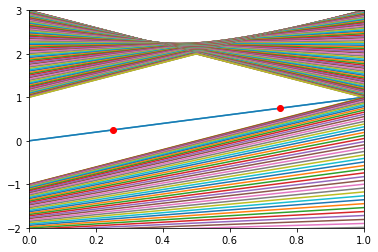

In [7]:
ntA = 101
Ess = np.zeros((2*cells, ntA))
tA_array = np.zeros((1, ntA))


A_PB = np.zeros((1, ntA))
A_PA = np.zeros((1, ntA))


for i in range(ntA):
    t_AA = 0.0
    t_BB = t_AA
    t_A = -0.01 * i
    t_B = t_A
    tA_array[0,i] = t_A
    print("i: ",i)
    print('t_A: ',t_A)
    Delt = 0.

    Hcell = np.array([[Delt, t_intra], [t_intra,0]])
    T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
    T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
    

    T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
    T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])

    SSH_Ham = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
     + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
    
    eigenvalues, eigenvectors = LA.eig(SSH_Ham)
    # sorting
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    
    
    
    Ess[:,i]=eigenvalues

    inx = np.arange(2*cells)
#    plt.stem(inx, eigenvalues, use_line_collection = True) 
#    plt.show() 


    ESs = eigenvectors

#    plt.stem(inx, np.real(ESs[cells]), use_line_collection = True) 
#    plt.show() 

    xA = np.linspace(0, 2*cells-1, 2*cells)

    # Pick the edge state from all eigenstates
    EDG1 = ESs[cells-1]
    EDG2 = ESs[cells]


    xsA = np.linspace(0, cells-1, cells)

    xsB = np.empty((xsA.size + xsA.size,), dtype=xsA.dtype)
    xsB[0::2] = xsA
    xsB[1::2] = xsA

    xsA_B = xsB - (xsB[int(cells-1)]+xsB[int(cells)])/2

    WED2=np.sum(np.multiply(xsA_B, np.abs(EDG2).T )  )

    WED1=np.sum(np.multiply(xsA_B, np.abs(EDG1).T )  )

    if WED1 < WED2:
        EDG = EDG1
    elif WED1 > WED2:
        EDG = EDG2
    


    Es_LA = np.abs(PA_L*EDG)
    Es_LB = np.abs(PB_L*EDG)
#    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#    ax1.plot(xA, Es_LA, label="LeftEdgeState_A")
#    ax2.plot(xA, Es_LB, label="LeftEdgeState_B")
##    ax1.legend()
##    ax2.legend()
#    plt.show()
#    fig.suptitle('Mid-gap Edge states: Localized on left boundary')
#    plt.close()


    xsA = np.linspace(0, cells-1, cells)
    ###############################################################################
    ###############################################################################
    popt_LB, pcov_LB = curve_fit(func, xsA, Es_LB[1:2*cells:2,0], p0 = (np.sqrt(3)/2, 1/3, 1))
    #popt
    #array([2.56274217, 1.37268521, 0.47427475])
#    plt.plot(xsA, func(xsA, *popt_LB), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB))
#    plt.plot(xsA, Es_LB[1:2*cells:2,0]+0.001, 'b-',label="State1")
#    plt.xlim(0, 16)
#    plt.ylim(0, 0.1)
#    plt.grid()
#    plt.show()
    ###############################################################################
    ###############################################################################
    popt_LA, pcov_LA = curve_fit(func, xsA, Es_LA[0:2*cells:2,0], p0 = (np.sqrt(3)/2, 1/3, 1))
    #popt
    #array([2.56274217, 1.37268521, 0.47427475])
#    plt.plot(xsA, func(xsA, *popt_LA), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA))
#    plt.plot(xsA, Es_LA[0:2*cells:2,0]+0.005, 'b-',label="State1")
#    plt.xlim(0, 16)
#    plt.ylim(0, 1)
#    plt.grid()
#    plt.show()

    A_PB[0,i] = popt_LB[0]
    A_PA[0,i] = popt_LA[0]


tA_ind = np.arange(0, ntA)


fig, ax = subplots()
plt.plot(np.abs(tA_array).T, Ess.T)
plt.plot(0.25,0.25,'ro')
plt.plot(0.75,0.75,'ro')
plt.xlim(0, 1)
plt.ylim(-2, 3)

ax.set_xlabel('$|J_1|$', **axis_font);
ax.set_ylabel("Eigen energy", **axis_font);
plt.tick_params(labelsize=18)
#ax.legend(("Numerical (sublattice B)","fitting curve",
#           "Numerical (sublattice A)","fitting curve") 
#           ,loc='upper right', bbox_to_anchor=(1.00, 0.9), prop={'size': 14} );
#show()
plt.savefig('correct6.pdf')
plt.show()
plt.close()



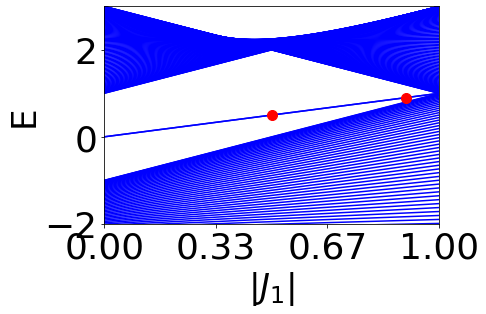

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [8]:
axis_font = {'size':'34'}
fig, ax = subplots()
plt.plot(np.abs(tA_array).T, Ess.T, 'b-')
#plt.plot(np.abs(tA_array[cells/2]).T, Ess[cells/2].T, 'g-')
#plt.plot(0.1,0.1,'ro', markersize=10)
plt.plot(0.5,0.5,'ro', markersize=10)
plt.plot(0.9,0.9,'ro', markersize=10)
plt.xlim(0, 1)
plt.ylim(-2, 3)
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter('{x:.02f}')
plt.xticks(fontsize=30)
ax.set_xlabel('$|J_1|$', **axis_font);
#ax.set_ylabel("Eigen energy", **axis_font);
ax.set_ylabel("E", **axis_font);
plt.tick_params(labelsize=36)
#plt.gca().set_prop_cycle(color=['blue'])
#ax.legend(("Numerical (sublattice B)","fitting curve",
#           "Numerical (sublattice A)","fitting curve") 
#           ,loc='upper right', bbox_to_anchor=(1.00, 0.9), prop={'size': 14} );
#show()
plt.savefig('bands.png')
plt.show()
plt.close()
plt.figure(figsize=(2,2))

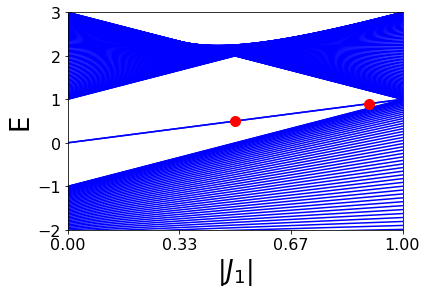

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [9]:
axis_font = {'size':'26'}
fig, ax = subplots()
plt.plot(np.abs(tA_array).T, Ess.T, 'b-')
#plt.plot(np.abs(tA_array[cells/2]).T, Ess[cells/2].T, 'g-')
#plt.plot(0.1,0.1,'ro', markersize=10)
plt.plot(0.5,0.5,'ro', markersize=10)
plt.plot(0.9,0.9,'ro', markersize=10)

#plt.plot(0.90,0.90,'ro', markersize=7)
plt.xlim(0, 1)
plt.ylim(-2, 3)
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter('{x:.02f}')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('$|J_1|$', **axis_font);
#ax.set_ylabel("Eigen energy", **axis_font);
ax.set_ylabel("E", **axis_font);
#plt.tick_params(labelsize=36)
#plt.gca().set_prop_cycle(color=['blue'])
#ax.legend(("Numerical (sublattice B)","fitting curve",
#           "Numerical (sublattice A)","fitting curve") 
#           ,loc='upper right', bbox_to_anchor=(1.00, 0.9), prop={'size': 14} );
#show()
plt.savefig('bands.png')
plt.show()
plt.close()
plt.figure(figsize=(2,2))

## $J_1$ =  0.0, $J_2$ =  0.0

## Set parameters

In [163]:
t_intra = -1.0
t_inter = -2.0
J1 = -0.0
J2 = -0.0

t_A = J1
t_B = t_A

Delt = 0.

## Attributes

In [164]:
cells = 100
cell_sites = 2
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL

### Form the Lattice Hamiltonian

### Unit Cells and couple submatrices

In [165]:
Hcell = np.array([[Delt, t_intra], [t_intra,0]])
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])


In [166]:
Hcell = np.array([[Delt, t_intra], [t_intra,0]])
inter_hop = [T_inter_cell_0, T_inter_cell_1]

Latt_Ham0 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) 

In [167]:
Latt_Ham0

array([[ 0., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  0., -2., ...,  0.,  0.,  0.],
       [ 0., -2.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., -2.,  0.],
       [ 0.,  0.,  0., ..., -2.,  0., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  0.]])

In [168]:
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_0 = np.linspace(0, cells-1, cells)

### Calculate and Plot The Eigenspectrum

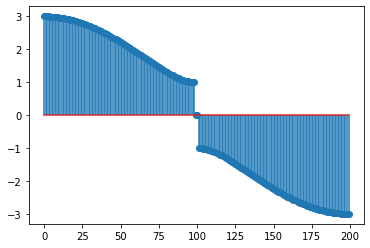

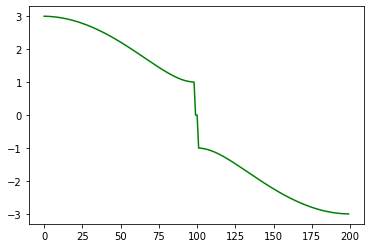

In [169]:
eigenvalues, eigenvectors = LA.eig(Latt_Ham0)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

#Plotting
e_indx = np.arange(2*cells)
plt.stem(e_indx, np.real(eigenvalues), use_line_collection = True) 
plt.show() 

fig, ax = subplots()
plt.plot(e_indx, np.real(eigenvalues), 'g',label="r$|1 \rangle$")

In [170]:
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))

### Resolve into Sublattices

In [171]:
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

########### If the curves are not localized on the left, we have to
########### to come back here to change between True and False
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/1665068982.py:15: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_0, EsLB_0))
/tmp/ipykernel_6433/1665068982.py:15: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_0, EsLB_0))


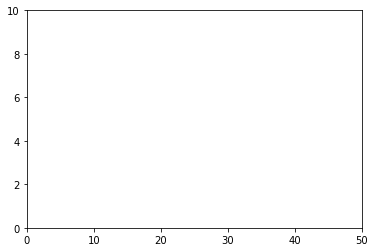

In [172]:
# copying to python array to take a elementwise division
EsLB_0 = np.zeros(cells, dtype=complex)
EsLA_0 = np.zeros(cells, dtype=complex)

Negate = 1 # We negate the eigenvectors for making the final plot.

Vtol = 1E-13
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_0[i] = Negate*EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_0[i] = Negate*EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_0, EsLA_0))
Ratio_Array = np.abs(np.divide(EsLA_0, EsLB_0))

plt.plot(x_subL_0, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 50)
plt.ylim(0, 10)
plt.show()

In [173]:
Ratio_Array

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

Some data handling:

### Plotting Sublattice-wise

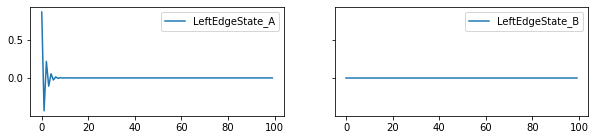

In [175]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
ax1.plot(x_subL_0, np.real(EsLA_f), label="LeftEdgeState_A")
ax2.plot(x_subL_0, np.real(EsLB_f), label="LeftEdgeState_B")

ax1.legend()
ax2.legend()

plt.show()
fig.suptitle('Mid-gap Edge states: Localized')
plt.close()

More Data handling:

EsLB_, EsLA_ are to be fitted with a geometric series shape.

### Curve Fitting

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


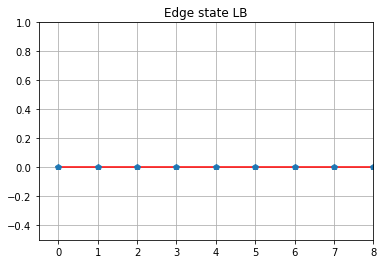

In [176]:
###############################################################################
popt_LB_0, pcov_LB_0 = curve_fit(func, x_subL_0, EsLB_0, p0 = (np.sqrt(3)/2, 1/2, 0))
plt.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_0))
plt.plot(x_subL_0, EsLB_0+0.00, 'p',label="StateB")
plt.xlim(-0.5, 8)
plt.ylim(-0.5, 1.0)
plt.grid()
plt.title('Edge state LB')
plt.show()
plt.close()
###############################################################################

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


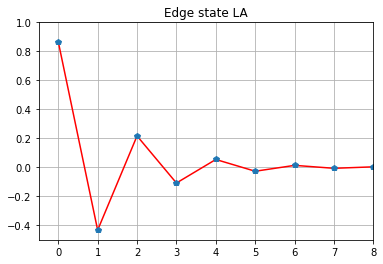

In [177]:
###############################################################################
popt_LA_0, pcov_LA_0 = curve_fit(func, x_subL_0, EsLA_0, p0 = (np.sqrt(3)/2, 1/2, 0))
plt.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_0))
plt.plot(x_subL_0, EsLA_0+0.000, 'p',label="StateA")
plt.xlim(-0.5, 8)
plt.ylim(-0.5, 1.0)
plt.grid()
plt.title('Edge state LA')
plt.show()
plt.close()
###############################################################################

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


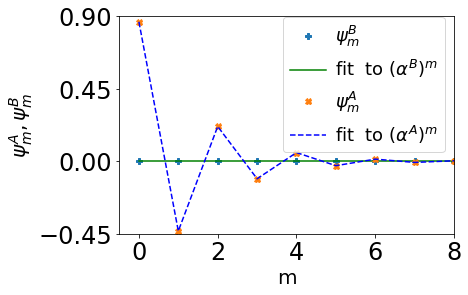

<Figure size 144x144 with 0 Axes>

In [178]:
axis_font = {'size':'20'}
###############################################################################
fig, ax = subplots()
plt.plot(x_subL_0, EsLB_0+0.00, 'P',label="StateB")
plt.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_0))
plt.plot(x_subL_0, EsLA_0+0.000, 'X',label="StateA")
plt.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_0))

plt.xlim(-0.5, 8)
plt.ylim(-0.45, 0.9)

ax.set_xlabel('m', **axis_font);
ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.00, 1.04), prop={'size': 18} )
ax.yaxis.set_major_locator(LinearLocator(4))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_0.png')

## $J_1$=-0.25, $J_2$=0.0

In [183]:
cells = 100
J1 = -0.25
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham1 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)

# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_1 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham1)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

########### If the curves are not localized on the left, we have to
########### to come back here to change between True and False
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/1337855864.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_1, EsLB_1))
/tmp/ipykernel_6433/1337855864.py:13: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_1, EsLB_1))


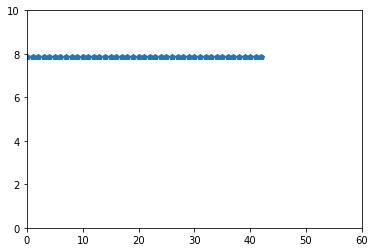

In [184]:
# copying to python array to take a elementwise division
EsLB_1 = np.zeros(cells, dtype=complex)
EsLA_1 = np.zeros(cells, dtype=complex)

Vtol = 1E-13
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_1[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_1[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_1, EsLA_1))
Ratio_Array = np.abs(np.divide(EsLA_1, EsLB_1))

plt.plot(x_subL_1, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 60)
plt.ylim(0, 10)
plt.show()

In [185]:
Ratio_Array

array([7.87298335, 7.87298335, 7.87298335, 7.87298335, 7.87298335,
       7.87298335, 7.87298335, 7.87298335, 7.87298335, 7.87298335,
       7.87298335, 7.87298335, 7.87298335, 7.87298335, 7.87298335,
       7.87298335, 7.87298335, 7.87298335, 7.87298335, 7.87298335,
       7.87298335, 7.87298335, 7.87298334, 7.87298334, 7.87298332,
       7.87298334, 7.87298327, 7.87298282, 7.87298184, 7.8729808 ,
       7.87298157, 7.87297894, 7.87297321, 7.87296691, 7.87296564,
       7.87302164, 7.8729833 , 7.87307094, 7.87314752, 7.87211314,
       7.86973368, 7.87176873, 7.87674648,        inf,        inf,
              inf,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


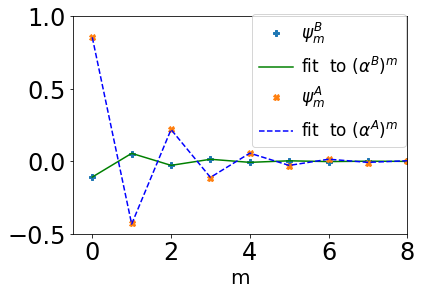

<Figure size 144x144 with 0 Axes>

In [186]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_1, pcov_LB_1 = curve_fit(func, x_subL_1, EsLB_1, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_1, pcov_LA_1 = curve_fit(func, x_subL_1, EsLA_1, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_1, EsLB_1+0.00, 'P',label="StateB")
plt.plot(x_subL_1, func(x_subL_1, *popt_LB_1), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_1))
plt.plot(x_subL_1, EsLA_1+0.000, 'X',label="StateA")
plt.plot(x_subL_1, func(x_subL_1, *popt_LA_1), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_1))

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 1.0)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.02, 1.05), prop={'size': 17} );
ax.yaxis.set_major_locator(LinearLocator(4))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_1.png')

## $J_1$=-0.5

In [187]:
cells = 100
J1 = -0.5
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham2 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_2 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham2)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

########### If the curves are not localized on the left, we have to
########### to come back here to change between True and False

do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/1126397295.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_2, EsLB_2))
/tmp/ipykernel_6433/1126397295.py:13: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_2, EsLB_2))


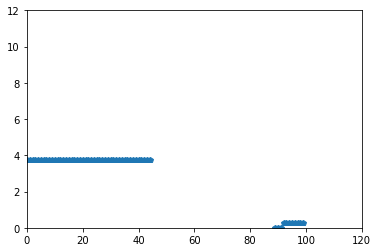

In [188]:
# copying to python array to take a elementwise division
EsLB_2 = np.zeros(cells, dtype=complex)
EsLA_2 = np.zeros(cells, dtype=complex)

Vtol = 1E-11
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_2[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_2[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_2, EsLA_2))
Ratio_Array = np.abs(np.divide(EsLA_2, EsLB_2))

plt.plot(x_subL_2, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 120)
plt.ylim(0, 12)
plt.show()

In [189]:
Ratio_Array

array([3.73205081, 3.73205081, 3.73205081, 3.73205081, 3.73205081,
       3.73205081, 3.73205081, 3.73205081, 3.73205081, 3.73205081,
       3.73205081, 3.73205081, 3.73205081, 3.73205081, 3.73205081,
       3.73205081, 3.73205081, 3.73205081, 3.73205081, 3.73205081,
       3.73205081, 3.73205081, 3.73205081, 3.73205081, 3.73205081,
       3.73205081, 3.73205081, 3.7320508 , 3.73205081, 3.73205082,
       3.73205082, 3.73205077, 3.73205087, 3.73205079, 3.7320506 ,
       3.73205072, 3.73205123, 3.73205072, 3.73205101, 3.73205293,
       3.73205289, 3.73205012, 3.73205076, 3.73206212, 3.73209715,
              inf,        inf,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


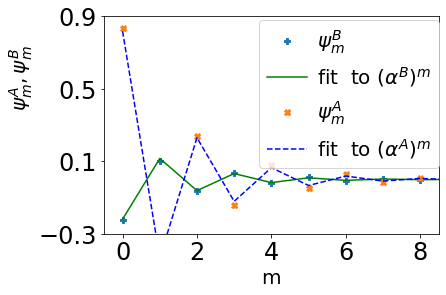

<Figure size 144x144 with 0 Axes>

In [190]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_2, pcov_LB_2 = curve_fit(func, x_subL_2, EsLB_2, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_2, pcov_LA_2 = curve_fit(func, x_subL_2, EsLA_2, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_2, EsLB_2+0.00, 'P',label="StateB")
plt.plot(x_subL_2, func(x_subL_2, *popt_LB_2), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_2))
plt.plot(x_subL_2, EsLA_2+0.000, 'X',label="StateA")
plt.plot(x_subL_2, func(x_subL_2, *popt_LA_2), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_2))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.3, 0.9)

ax.set_xlabel('m', **axis_font);
ax.set_ylabel("               $\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.03), prop={'size': 20} );
ax.yaxis.set_major_locator(LinearLocator(4))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_2.png')

## $J_1$=-0.75

In [191]:
cells = 100
J1 = -0.75
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham3 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_3 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham3)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/3860005531.py:12: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLB_3, EsLA_3))
/tmp/ipykernel_6433/3860005531.py:12: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLB_3, EsLA_3))


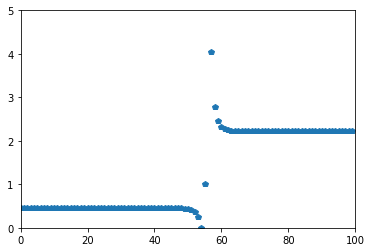

In [192]:
# copying to python array to take a elementwise division
EsLB_3 = np.zeros(cells, dtype=complex)
EsLA_3 = np.zeros(cells, dtype=complex)

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_3[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_3[i] = EsLA_f[i,0]

Ratio_Array = np.abs(np.divide(EsLB_3, EsLA_3))
#Ratio_Array = np.abs(np.divide(EsLA_3, EsLB_3))

plt.plot(x_subL_3, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 5)
plt.show()

In [193]:
Ratio_Array

array([0.45141623, 0.45141623, 0.45141623, 0.45141623, 0.45141623,
       0.45141623, 0.45141623, 0.45141623, 0.45141623, 0.45141623,
       0.45141623, 0.45141623, 0.45141623, 0.45141623, 0.45141623,
       0.45141623, 0.45141623, 0.45141623, 0.45141623, 0.45141623,
       0.45141623, 0.45141623, 0.45141623, 0.45141623, 0.45141623,
       0.45141623, 0.45141623, 0.45141623, 0.45141623, 0.45141623,
       0.45141622, 0.45141621, 0.45141619, 0.45141615, 0.45141607,
       0.4514159 , 0.45141555, 0.45141481, 0.45141326, 0.45141003,
       0.4514033 , 0.45138927, 0.45136   , 0.45129894, 0.45117158,
       0.45090586, 0.45035136, 0.44919369, 0.44677412, 0.44170598,
       0.4310408 , 0.40837748, 0.35920321, 0.24750386, 0.        ,
       0.99659596,        inf, 4.04995428, 2.78588221, 2.44939737,
       2.32025238, 2.26407877, 2.23832771, 2.22623967, 2.220502  ,
       2.21776432, 2.21645478, 2.21582764, 2.21552711, 2.21538308,
       2.21531403, 2.21528092, 2.21526505, 2.21525744, 2.21525

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


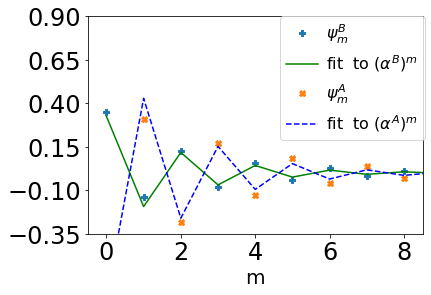

<Figure size 144x144 with 0 Axes>

In [194]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_3, pcov_LB_3 = curve_fit(func, x_subL_3, EsLB_3, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_3, pcov_LA_3 = curve_fit(func, x_subL_3, EsLA_3, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_3, EsLB_3+0.00, 'P',label="StateB")
plt.plot(x_subL_3, func(x_subL_3, *popt_LB_3), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_3))
plt.plot(x_subL_3, EsLA_3+0.000, 'X',label="StateA")
plt.plot(x_subL_3, func(x_subL_3, *popt_LA_3), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_3))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1=-1.0$

In [195]:
cells = 100
J1 = -1.00
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham4 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_4 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham4)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

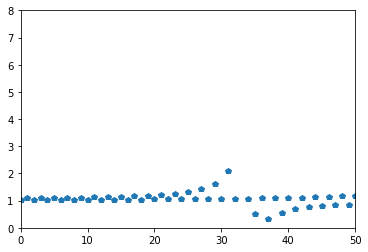

In [196]:
# copying to python array to take a elementwise division
EsLB_4 = np.zeros(cells, dtype=complex)
EsLA_4 = np.zeros(cells, dtype=complex)

Vtol = 1E-12
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_4[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_4[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_4, EsLA_4))
Ratio_Array = np.abs(np.divide(EsLA_4, EsLB_4))

plt.plot(x_subL_4, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 50)
plt.ylim(0, 8)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


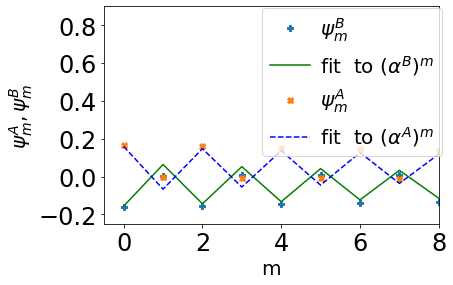

<Figure size 144x144 with 0 Axes>

In [197]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_4, pcov_LB_4 = curve_fit(func, x_subL_4, EsLB_4, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_4, pcov_LA_4 = curve_fit(func, x_subL_4, EsLA_4, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_4, EsLB_4+0.00, 'P',label="StateB")
plt.plot(x_subL_4, func(x_subL_4, *popt_LB_4), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_4))
plt.plot(x_subL_4, EsLA_4+0.000, 'X',label="StateA")
plt.plot(x_subL_4, func(x_subL_4, *popt_LA_4), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_4))

plt.xlim(-0.5, 8)
plt.ylim(-0.25, 0.9)

ax.set_xlabel('m', **axis_font);
ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.04, 1.04), prop={'size': 20} );
#ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneTwoP.png')

## $J_1$=-0.10, $J_2$=-0.10

In [198]:
cells = 100
J1 = -0.1
t_A = J1
t_B = t_A
J2 = -0.1
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham5 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_5 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham5)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/3403551954.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_5, EsLB_5))
/tmp/ipykernel_6433/3403551954.py:13: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_5, EsLB_5))


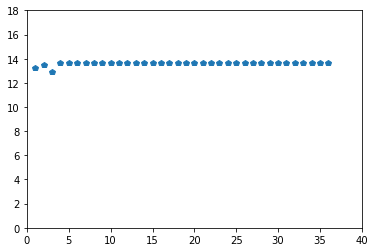

In [199]:
# copying to python array to take a elementwise division
EsLB_5 = np.zeros(cells, dtype=complex)
EsLA_5 = np.zeros(cells, dtype=complex)

Vtol = 1E-12
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_5[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_5[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_5, EsLA_5))
Ratio_Array = np.abs(np.divide(EsLA_5, EsLB_5))

plt.plot(x_subL_5, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 40)
plt.ylim(0, 18)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


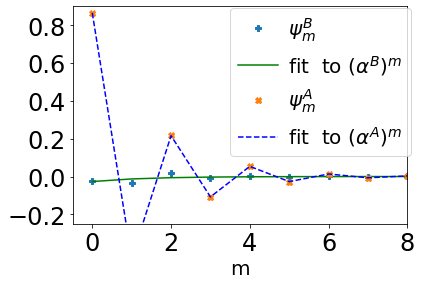

<Figure size 144x144 with 0 Axes>

In [200]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_5, pcov_LB_5 = curve_fit(func, x_subL_5, EsLB_5, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_5, pcov_LA_5 = curve_fit(func, x_subL_5, EsLA_5, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_5, EsLB_5+0.00, 'P',label="StateB")
plt.plot(x_subL_5, func(x_subL_5, *popt_LB_5), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_5))
plt.plot(x_subL_5, EsLA_5+0.000, 'X',label="StateA")
plt.plot(x_subL_5, func(x_subL_5, *popt_LA_5), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_5))

plt.xlim(-0.5, 8)
plt.ylim(-0.25, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.04, 1.04), prop={'size': 20} );
#ax.yaxis.set_major_locator(LinearLocator(5))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneTwoP_1.png')

## $J_1$=-0.10, $J_2$=-0.20

In [201]:
cells = 100
J1 = -0.10
t_A = J1
t_B = t_A
J2 = -0.20
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham6 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_6 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham6)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/2085714294.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_6, EsLB_6))
/tmp/ipykernel_6433/2085714294.py:16: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_6, EsLB_6))


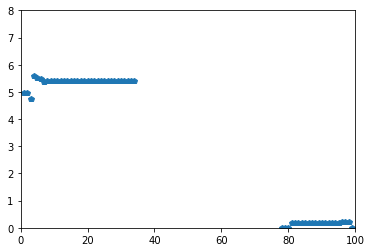

In [202]:
# copying to python array to take a elementwise division
EsLB_6 = np.zeros(cells, dtype=complex)
EsLA_6 = np.zeros(cells, dtype=complex)


neg6 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_6[i] = neg6 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_6[i] = neg6 * EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_6, EsLA_6))
Ratio_Array = np.abs(np.divide(EsLA_6, EsLB_6))

plt.plot(x_subL_6, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 8)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


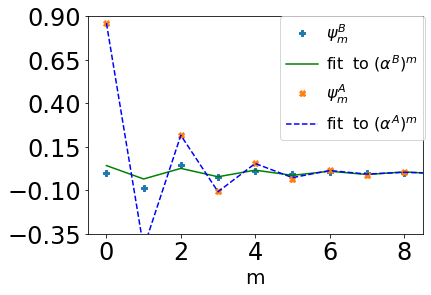

<Figure size 144x144 with 0 Axes>

In [203]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_6, pcov_LB_6 = curve_fit(func, x_subL_6, EsLB_6, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_6, pcov_LA_6 = curve_fit(func, x_subL_6, EsLA_6, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_6, EsLB_6+0.00, 'P',label="StateB")
plt.plot(x_subL_6, func(x_subL_6, *popt_LB_6), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_6))
plt.plot(x_subL_6, EsLA_6+0.000, 'X',label="StateA")
plt.plot(x_subL_6, func(x_subL_6, *popt_LA_6), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_6))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.20, $J_2$=-0.10

In [204]:
cells = 100
J1 = -0.20
t_A = J1
t_B = t_A
J2 = -0.10
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham7 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_7 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham7)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/2213594851.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_7, EsLB_7))
/tmp/ipykernel_6433/2213594851.py:16: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_7, EsLB_7))


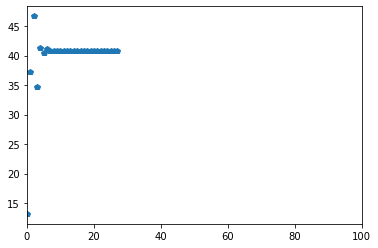

In [205]:
# copying to python array to take a elementwise division
EsLB_7 = np.zeros(cells, dtype=complex)
EsLA_7 = np.zeros(cells, dtype=complex)


neg7 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_7[i] = neg7 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_7[i] = neg7 * EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_7, EsLA_7))
Ratio_Array = np.abs(np.divide(EsLA_7, EsLB_7))

plt.plot(x_subL_7, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
#plt.ylim(0, 2)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


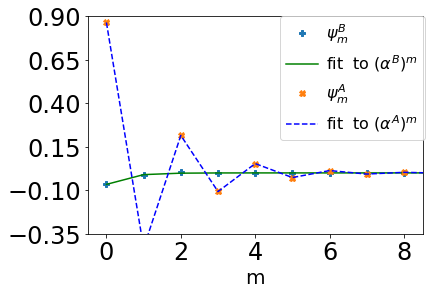

<Figure size 144x144 with 0 Axes>

In [206]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_7, pcov_LB_7 = curve_fit(func, x_subL_7, EsLB_7, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_7, pcov_LA_7 = curve_fit(func, x_subL_7, EsLA_7, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_7, EsLB_7+0.00, 'P',label="StateB")
plt.plot(x_subL_7, func(x_subL_7, *popt_LB_7), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_7))
plt.plot(x_subL_7, EsLA_7+0.000, 'X',label="StateA")
plt.plot(x_subL_7, func(x_subL_7, *popt_LA_7), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_7))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.20, $J_2$=-0.20

In [207]:
cells = 100
J1 = -0.20
t_A = J1
t_B = t_A
J2 = -0.20
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham8 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_8 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham8)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/2420092623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_8, EsLB_8))
/tmp/ipykernel_6433/2420092623.py:16: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_8, EsLB_8))


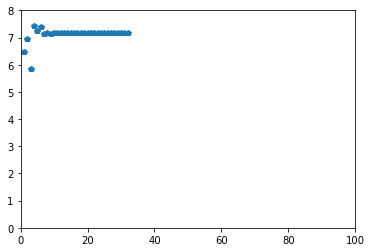

In [208]:
# copying to python array to take a elementwise division
EsLB_8 = np.zeros(cells, dtype=complex)
EsLA_8 = np.zeros(cells, dtype=complex)


neg8 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_8[i] = neg8 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_8[i] = neg8 * EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_8, EsLA_8))
Ratio_Array = np.abs(np.divide(EsLA_8, EsLB_8))

plt.plot(x_subL_8, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 8)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


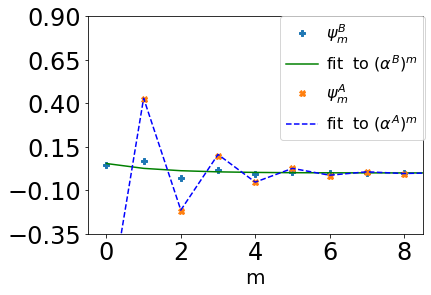

<Figure size 144x144 with 0 Axes>

In [209]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_8, pcov_LB_8 = curve_fit(func, x_subL_8, EsLB_8, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_8, pcov_LA_8 = curve_fit(func, x_subL_8, EsLA_8, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_8, EsLB_8+0.00, 'P',label="StateB")
plt.plot(x_subL_8, func(x_subL_8, *popt_LB_8), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_8))
plt.plot(x_subL_8, EsLA_8+0.000, 'X',label="StateA")
plt.plot(x_subL_8, func(x_subL_8, *popt_LA_8), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_8))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.50, $J_2$=-0.50

In [210]:
cells = 100
J1 = -0.50
t_A = J1
t_B = t_A
J2 = -0.50
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham3 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_9 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham3)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells - 1
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/777910792.py:15: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLB_9, EsLA_9))
/tmp/ipykernel_6433/777910792.py:15: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLB_9, EsLA_9))


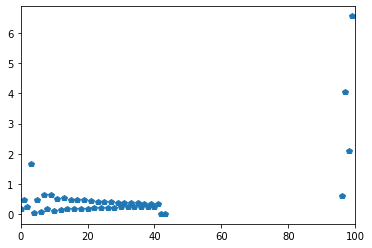

In [211]:
# copying to python array to take a elementwise division
EsLB_9 = np.zeros(cells, dtype=complex)
EsLA_9 = np.zeros(cells, dtype=complex)


neg9 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_9[i] = neg9 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_9[i] = neg9 * EsLA_f[i,0]

Ratio_Array = np.abs(np.divide(EsLB_9, EsLA_9))
#Ratio_Array = np.abs(np.divide(EsLA_9, EsLB_9))

plt.plot(x_subL_9, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
#plt.ylim(0, 12)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


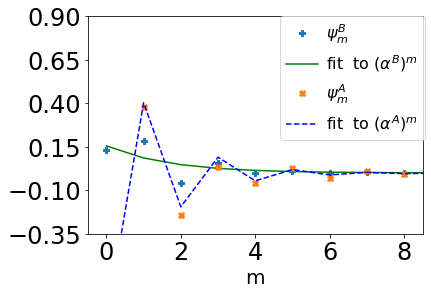

<Figure size 144x144 with 0 Axes>

In [212]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_9, pcov_LB_9 = curve_fit(func, x_subL_9, EsLB_9, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_9, pcov_LA_9 = curve_fit(func, x_subL_9, EsLA_9, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_9, EsLB_9+0.00, 'P',label="StateB")
plt.plot(x_subL_9, func(x_subL_9, *popt_LB_9), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_9))
plt.plot(x_subL_9, EsLA_9+0.000, 'X',label="StateA")
plt.plot(x_subL_9, func(x_subL_9, *popt_LA_9), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_9))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.90, $J_2$=-0.0

In [213]:
cells = 100
J1 = -0.90
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham3 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_10 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham3)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells - 1
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

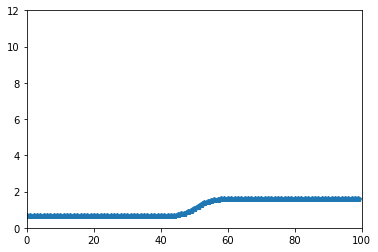

In [214]:
# copying to python array to take a elementwise division
EsLB_10 = np.zeros(cells, dtype=complex)
EsLA_10 = np.zeros(cells, dtype=complex)


neg10 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_10[i] = neg9 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_10[i] = neg9 * EsLA_f[i,0]

Ratio_Array = np.abs(np.divide(EsLB_10, EsLA_10))
#Ratio_Array = np.abs(np.divide(EsLA_10, EsLB_10))

plt.plot(x_subL_10, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 12)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


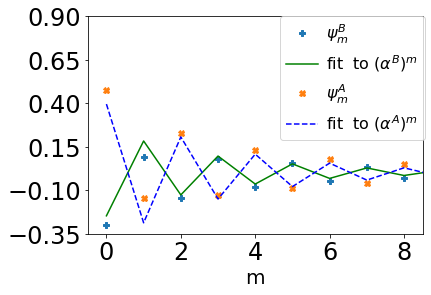

<Figure size 144x144 with 0 Axes>

In [215]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_10, pcov_LB_10 = curve_fit(func, x_subL_10, EsLB_10, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_10, pcov_LA_10 = curve_fit(func, x_subL_10, EsLA_10, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_10, EsLB_10+0.00, 'P',label="StateB")
plt.plot(x_subL_10, func(x_subL_10, *popt_LB_10), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_10))
plt.plot(x_subL_10, EsLA_10+0.000, 'X',label="StateA")
plt.plot(x_subL_10, func(x_subL_10, *popt_LA_10), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_10))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.10, $J_2$=-0.0

In [216]:
cells = 100
J1 = -0.10
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham11 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_11 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham11)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/598304987.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_11, EsLB_11))
/tmp/ipykernel_6433/598304987.py:16: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_11, EsLB_11))


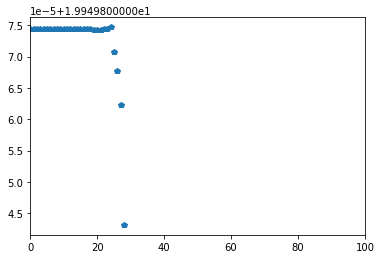

In [217]:
# copying to python array to take a elementwise division
EsLB_11 = np.zeros(cells, dtype=complex)
EsLA_11 = np.zeros(cells, dtype=complex)


neg11 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_11[i] = neg11 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_11[i] = neg11 * EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_11, EsLA_11))
Ratio_Array = np.abs(np.divide(EsLA_11, EsLB_11))

plt.plot(x_subL_11, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
#plt.ylim(0, 12)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


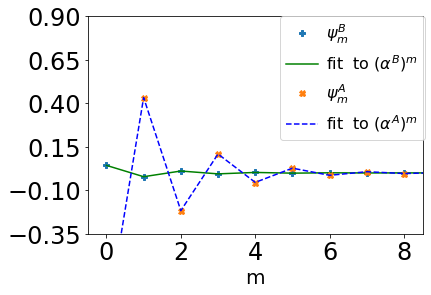

<Figure size 144x144 with 0 Axes>

In [218]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_11, pcov_LB_11 = curve_fit(func, x_subL_11, EsLB_11, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_11, pcov_LA_11 = curve_fit(func, x_subL_11, EsLA_11, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_11, EsLB_11+0.00, 'P',label="StateB")
plt.plot(x_subL_11, func(x_subL_11, *popt_LB_11), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_11))
plt.plot(x_subL_11, EsLA_11+0.000, 'X',label="StateA")
plt.plot(x_subL_11, func(x_subL_11, *popt_LA_11), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_11))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.20, $J_2$=-0.0

In [219]:
cells = 100
J1 = -0.20
t_A = J1
t_B = t_A
J2 = -0.0
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham12 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_12 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham12)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_6433/2592489147.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_12, EsLB_12))
/tmp/ipykernel_6433/2592489147.py:16: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_12, EsLB_12))


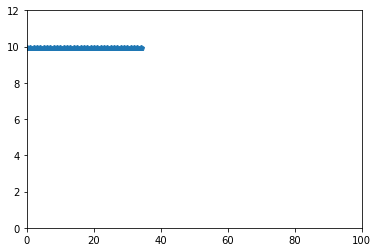

In [220]:
# copying to python array to take a elementwise division
EsLB_12 = np.zeros(cells, dtype=complex)
EsLA_12 = np.zeros(cells, dtype=complex)


neg12 = -1 # flipping the sign for later convenience

Vtol = 1E-11
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_12[i] = neg12 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_12[i] = neg12 * EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_12, EsLA_12))
Ratio_Array = np.abs(np.divide(EsLA_12, EsLB_12))

plt.plot(x_subL_12, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 12)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


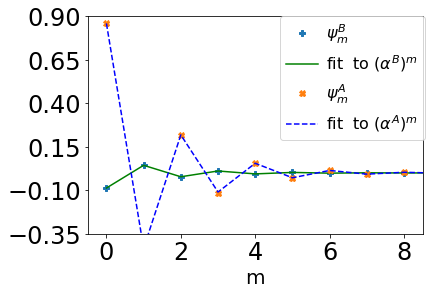

<Figure size 144x144 with 0 Axes>

In [221]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_12, pcov_LB_12 = curve_fit(func, x_subL_12, EsLB_12, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_12, pcov_LA_12 = curve_fit(func, x_subL_12, EsLA_12, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_12, EsLB_12+0.00, 'P',label="StateB")
plt.plot(x_subL_12, func(x_subL_12, *popt_LB_12), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_12))
plt.plot(x_subL_12, EsLA_12+0.000, 'X',label="StateA")
plt.plot(x_subL_12, func(x_subL_12, *popt_LA_12), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_12))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## The figure in the letter

##  (b) $J_1$=-0.5, $J_2$=0.0, (c) $J_1$=-0.5, $J_2$=-0.5, (d) $J_1$=-0.9, $J_2$=0.0

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

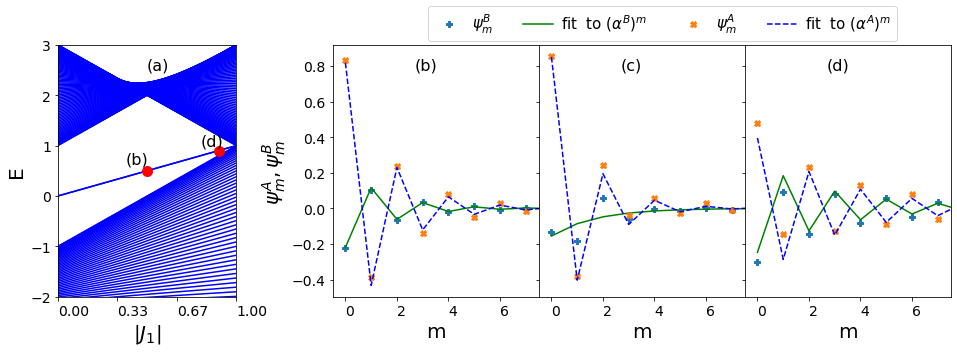

In [222]:
axis_font = {'size':'20'}

widths = [3, 1, 3, 3, 3]
heights = [4]

gs_left = plt.GridSpec(1, 5, top=1, wspace=0)
gs_base = plt.GridSpec(1, 5, top=1, width_ratios=widths,
                          height_ratios=heights, wspace=0)
#fig = plt.figure()
fig = plt.figure(figsize=(16, 4))


# Left (unshared) axes
left_ax = fig.add_subplot(gs_left[:,0])

left_ax.plot(np.abs(tA_array).T, Ess.T, 'b-')
#left_ax.plot(np.abs(tA_array[cells/2]).T, Ess[cells/2].T, 'g-')
#left_ax.plot(0.1,0.1,'ro', markersize=10)
left_ax.plot(0.5,0.5,'ro', markersize=10)
left_ax.plot(0.9,0.9,'ro', markersize=10)

#left_ax.plot(0.90,0.90,'ro', markersize=7)
left_ax.set_xlim(0, 1)
left_ax.set_ylim(-2, 3)
left_ax.xaxis.set_major_locator(LinearLocator(4))
left_ax.xaxis.set_major_formatter('{x:.02f}')
plt.setp(left_ax.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=True)
plt.setp(left_ax.get_yticklabels(), fontsize=14,visible=True)
left_ax.set_xlabel('$|J_1|$', **axis_font);
#left_ax.set_ylabel("Eigen energy", **axis_font);
left_ax.set_ylabel("E", **axis_font);

#left_ax.plot(np.random.normal(0, 1, 1000).cumsum())

# The four shared axes
ax = fig.add_subplot(gs_base[:,1]) # Need to create the first one to share...
other_axes = [fig.add_subplot(gs_base[:,i], sharey=ax) for i in range(2, 5)]
right_axes = [ax] + other_axes

a0 = right_axes[0]    
a1 = right_axes[1]    
a2 = right_axes[2]    
a3 = right_axes[3]    

a0.axis('off') 


a1.plot(x_subL_2, EsLB_2+0.00, 'P')
a1.plot(x_subL_2, func(x_subL_2, *popt_LB_2), 'g-')

a1.plot(x_subL_2, EsLA_2+0.000, 'X')
a1.plot(x_subL_2, func(x_subL_2, *popt_LA_2), 'b--')
a1.set_xlim(-0.5,7.5)
plt.setp(a1.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=True)
plt.setp(a1.get_yticklabels(), fontsize=14)
a1.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
a1.set_xlabel('m', **axis_font)

a2.plot(x_subL_9, -EsLB_9+0.00, 'P')
a2.plot(x_subL_9, -func(x_subL_9, *popt_LB_9), 'g-')
a2.plot(x_subL_9, -EsLA_9+0.000, 'X')
a2.plot(x_subL_9, -func(x_subL_9, *popt_LA_9), 'b--')
a2.set_xlim(-0.5,7.5)
plt.setp(a2.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=True)
plt.setp(a2.get_yticklabels(), fontsize=14, horizontalalignment="left", visible=False)
a2.set_xlabel('m', **axis_font)

a3.plot(x_subL_10, EsLB_10+0.00, 'P',label="$\psi^{B}_m$")
a3.plot(x_subL_10, func(x_subL_10, *popt_LB_10), 'g-', label=r"fit  to $(\alpha^B)^m$")
a3.plot(x_subL_10, EsLA_10+0.000, 'X',label="$\psi^{A}_m$")
a3.plot(x_subL_10, func(x_subL_10, *popt_LA_10), 'b--', label=r"fit  to $(\alpha^A)^m$")
a3.set_xlim(-0.5,7.5)
plt.setp(a3.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a3.get_yticklabels(), fontsize=14, horizontalalignment="left", visible=False)
a3.set_xlabel('m', **axis_font)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='upper center', ncol=4, handletextpad=0.525, bbox_to_anchor=(0.65, 1.16), prop={'size': 15} )


plt.text(0.5, 0.9, "(a)", fontsize=16, transform=left_ax.transAxes)
plt.text(0.38, 0.53, "(b)", fontsize=16, transform=left_ax.transAxes)
plt.text(0.8, 0.60, "(d)", fontsize=16, transform=left_ax.transAxes)

plt.text(0.4, 0.90, "(b)", fontsize=16, transform=a1.transAxes)
plt.text(0.4, 0.90, "(c)", fontsize=16, transform=a2.transAxes)
plt.text(0.4, 0.90, "(d)", fontsize=16, transform=a3.transAxes)
#plt.text(0.4, 0.90, "(e)", fontsize=16, transform=a5.transAxes)
#plt.text(0.4, 0.70, "(f)", fontsize=16, transform=a6.transAxes)

plt.savefig("OnePN.pdf", format="pdf", bbox_inches="tight")
plt.show()
#plt.savefig("OnePN.pdf", bbox_inches='tight')
#plt.savefig("OnePN.png", dpi=fig.dpi)

##  (a) $J_1$=-0.1, $J_2$=0.0, (b) $J_1$=-0.1, $J_2$=0.0, (b) $J_1$=-0.2, $J_2$=0.0, (c) $J_1$=-0.4, $J_2$=0.0, (d) $J_1$=-0.5, $J_2$=0.0

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

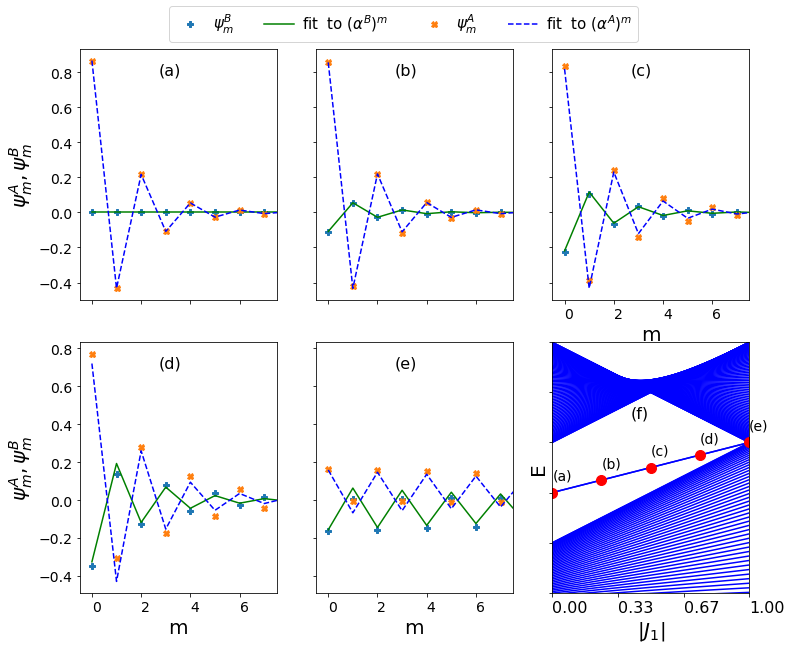

In [225]:
axis_font = {'size':'20'}

fig = plt.figure()

a1 = fig.add_subplot(2, 3, 1)
a2 = fig.add_subplot(2, 3, 2, sharey = a1)
a3 = fig.add_subplot(2, 3, 3, sharey = a1)

a4 = fig.add_subplot(2, 3, 4, sharex = a1)
a5 = fig.add_subplot(2, 3, 5, sharex = a2, sharey = a4)
a6 = fig.add_subplot(2, 3, 6)

plt.subplots_adjust(wspace=0.2, hspace=0.17)
#fig, (a1,a2,a3,a4,a5,a6) = plt.subplots(2,3,sharey=True)
#(fig1, fig2, fig3), axx = plt.subplots(3)
sasp = 3

fig = plt.gcf()
fig.set_size_inches(12, 10)
#fig.subplots_adjust(wspace=0.08, hspace=0)



#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

a1.plot(x_subL_0, EsLB_0+0.00, 'P')
a1.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'g-')
a1.plot(x_subL_0, EsLA_0+0.000, 'X')
a1.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'b--')
#a1.set_aspect(sasp)
a1.set_xlim(-0.5,7.5)
plt.setp(a1.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a1.get_yticklabels(), fontsize=14)
a1.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
#a1.xaxis.set_major_formatter(plt.NullFormatter())


#a1.set_xticklabels(np.arange(cells), fontsize=12)

#a1.set_xticks(fontsize=12)
#a1.set_yticks(fontsize=12)

a2.plot(x_subL_1, EsLB_1+0.00, 'P')
a2.plot(x_subL_1, func(x_subL_1, *popt_LB_1), 'g-')
a2.plot(x_subL_1, EsLA_1+0.000, 'X')
a2.plot(x_subL_1, func(x_subL_1, *popt_LA_1), 'b--')
#a2.set_aspect(sasp)
a2.set_xlim(-0.5,7.5)
plt.setp(a2.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a2.get_yticklabels(), fontsize=14, visible=False)
#a2.xaxis.set_major_formatter(plt.NullFormatter())
#a2.set_xticklabels([-1,2,5,8,10], fontsize=12)

#a1.axis('off')


a3.plot(x_subL_2, EsLB_2+0.00, 'P',label="$\psi^{B}_m$")
a3.plot(x_subL_2, func(x_subL_2, *popt_LB_2), 'g-', label=r"fit  to $(\alpha^B)^m$")
a3.plot(x_subL_2, EsLA_2+0.000, 'X',label="$\psi^{A}_m$")
a3.plot(x_subL_2, func(x_subL_2, *popt_LA_2), 'b--', label=r"fit  to $(\alpha^A)^m$")
#a3.set_aspect(sasp)
a3.set_xlim(-0.5,7.5)
plt.setp(a3.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a3.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)
a3.set_xlabel('m', **axis_font);

a4.plot(x_subL_3, -EsLB_3+0.00, 'P')
a4.plot(x_subL_3, -func(x_subL_3, *popt_LB_3), 'g-')
a4.plot(x_subL_3, -EsLA_3+0.000, 'X')
a4.plot(x_subL_3, -func(x_subL_3, *popt_LA_3), 'b--')
#a4.set_aspect(sasp)
a4.set_xlim(-0.5,7.5)
plt.setp(a4.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a4.get_yticklabels(), fontsize=14)
a4.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
plt.xticks(fontsize=16)
a4.set_xlabel('m', **axis_font)

#a4.set_xticklabels(np.arange(cells), fontsize=12)

#a4.set_xticks(fontsize=12)
#a4.set_yticks(fontsize=12)

a5.plot(x_subL_4, EsLB_4+0.00, 'P')
a5.plot(x_subL_4, func(x_subL_4, *popt_LB_4), 'g-')
a5.plot(x_subL_4, EsLA_4+0.000, 'X')
a5.plot(x_subL_4, func(x_subL_4, *popt_LA_4), 'b--')
#a5.set_aspect(sasp)
a5.set_xlim(-0.5,7.5)
plt.setp(a5.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a5.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)
a5.set_xlabel('m', **axis_font);





a6.plot(np.abs(tA_array).T, Ess.T, 'b-')
a6.plot(0.0,0.0,'ro', markersize=10)
a6.plot(0.25,0.25,'ro', markersize=10)
a6.plot(0.5,0.5,'ro', markersize=10)
a6.plot(0.75,0.75,'ro', markersize=10)
a6.plot(1.0,1.0,'ro', markersize=10)

#a6.set_aspect(sasp)
a6.set_xlim(0,1)
a6.set_ylim(-2,3)
plt.setp(a6.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a6.get_yticklabels(), fontsize=14, visible=False)
a6.xaxis.set_major_locator(LinearLocator(4))
a6.xaxis.set_major_formatter('{x:.02f}')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
a6.set_xlabel('$|J_1|$', **axis_font);
a6.set_ylabel("E", **axis_font)

plt.text(0.4, 0.90, "(a)", fontsize=16, transform=a1.transAxes)
plt.text(0.4, 0.90, "(b)", fontsize=16, transform=a2.transAxes)
plt.text(0.4, 0.90, "(c)", fontsize=16, transform=a3.transAxes)
plt.text(0.4, 0.90, "(d)", fontsize=16, transform=a4.transAxes)
plt.text(0.4, 0.90, "(e)", fontsize=16, transform=a5.transAxes)
plt.text(0.4, 0.70, "(f)", fontsize=16, transform=a6.transAxes)




plt.text(0.0,0.45, "(a)", fontsize=14, transform=a6.transAxes)
plt.text(0.25,0.50, "(b)", fontsize=14, transform=a6.transAxes)
plt.text(0.50,0.55, "(c)", fontsize=14, transform=a6.transAxes)
plt.text(0.75,0.60, "(d)", fontsize=14, transform=a6.transAxes)
plt.text(1.00,0.65, "(e)", fontsize=14, transform=a6.transAxes)

#a4.text(0.45, 1.1, string.ascii_uppercase[3]

#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#fig.legend(lines, labels, loc='upper center', ncol=4)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='upper center', ncol=4, handletextpad=0.525, bbox_to_anchor=(0.5, 0.95), prop={'size': 15} )
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)
#plt.figure(figsize=(8,3), dpi=800)
plt.savefig("OP_dr.pdf", format="pdf", bbox_inches="tight")
plt.show()


##  (a) $J_1$=-0.1, $J_2$=0.0,(b) $J_1$=-0.1, $J_2$=-0.0, (c) $J_1$=-0.2, $J_2$=0.0, (d) $J_1$=-0.2, $J_2$=-0.0
## (e) $J_1$=-0.1, $J_2$=-0.1,(f) $J_1$=-0.1, $J_2$=-0.2, (g) $J_1$=-0.2, $J_2$=-0.1, (h) $J_1$=-0.2, $J_2$=-0.2

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

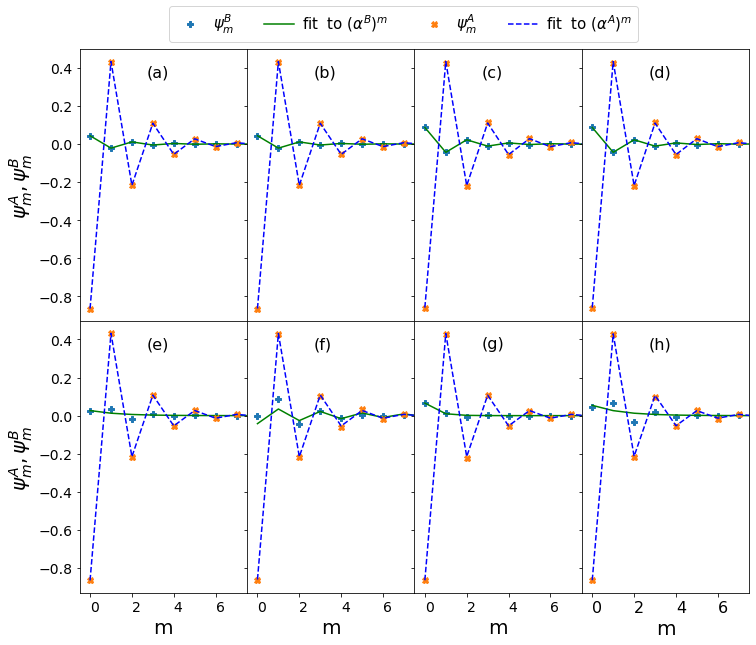

In [227]:
axis_font = {'size':'20'}

fig = plt.figure()

a1 = fig.add_subplot(2, 4, 1)
a2 = fig.add_subplot(2, 4, 2, sharey = a1)
a3 = fig.add_subplot(2, 4, 3, sharey = a1)
a4 = fig.add_subplot(2, 4, 4, sharey = a1)


a5 = fig.add_subplot(2, 4, 5, sharex = a1)
a6 = fig.add_subplot(2, 4, 6, sharex = a2, sharey = a5)
a7 = fig.add_subplot(2, 4, 7, sharex = a3, sharey = a5)
a8 = fig.add_subplot(2, 4, 8, sharex = a4, sharey = a5)


plt.subplots_adjust(wspace=0.0, hspace=0.0)
#fig, (a1,a2,a3,a4,a5,a6) = plt.subplots(2,3,sharey=True)
#(fig1, fig2, fig3), axx = plt.subplots(3)
sasp = 3

fig = plt.gcf()
fig.set_size_inches(12, 10)
#fig.subplots_adjust(wspace=0.08, hspace=0)



#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

a1.plot(x_subL_11, EsLB_11+0.00, 'P')
a1.plot(x_subL_11, func(x_subL_11, *popt_LB_11), 'g-')
a1.plot(x_subL_11, EsLA_11+0.000, 'X')
a1.plot(x_subL_11, func(x_subL_11, *popt_LA_11), 'b--')
#a1.set_aspect(sasp)
a1.set_xlim(-0.5,7.5)
plt.setp(a1.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a1.get_yticklabels(), fontsize=14)
a1.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
#a1.xaxis.set_major_formatter(plt.NullFormatter())


#a1.set_xticklabels(np.arange(cells), fontsize=12)

#a1.set_xticks(fontsize=12)
#a1.set_yticks(fontsize=12)

a2.plot(x_subL_11, EsLB_11+0.00, 'P')
a2.plot(x_subL_11, func(x_subL_11, *popt_LB_11), 'g-')
a2.plot(x_subL_11, EsLA_11+0.000, 'X')
a2.plot(x_subL_11, func(x_subL_11, *popt_LA_11), 'b--')
#a2.set_aspect(sasp)
a2.set_xlim(-0.5,7.5)
plt.setp(a2.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a2.get_yticklabels(), fontsize=14, visible=False)
#a2.xaxis.set_major_formatter(plt.NullFormatter())
#a2.set_xticklabels([-1,2,5,8,10], fontsize=12)

#a1.axis('off')


a3.plot(x_subL_12, -EsLB_12+0.00, 'P',label="$\psi^{B}_m$")
a3.plot(x_subL_12, -func(x_subL_12, *popt_LB_12), 'g-', label=r"fit  to $(\alpha^B)^m$")
a3.plot(x_subL_12, -EsLA_12+0.000, 'X',label="$\psi^{A}_m$")
a3.plot(x_subL_12, -func(x_subL_12, *popt_LA_12), 'b--', label=r"fit  to $(\alpha^A)^m$")
#a3.set_aspect(sasp)
a3.set_xlim(-0.5,7.5)
plt.setp(a3.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a3.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)

a4.plot(x_subL_12, -EsLB_12+0.00, 'P')
a4.plot(x_subL_12, -func(x_subL_12, *popt_LB_12), 'g-')
a4.plot(x_subL_12, -EsLA_12+0.000, 'X')
a4.plot(x_subL_12, -func(x_subL_12, *popt_LA_12), 'b--')
#a4.set_aspect(sasp)
a4.set_xlim(-0.5,7.5)
plt.setp(a4.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a4.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)

#a4.set_xticklabels(np.arange(cells), fontsize=12)

#a4.set_xticks(fontsize=12)
#a4.set_yticks(fontsize=12)

a5.plot(x_subL_5, -EsLB_5+0.00, 'P')
a5.plot(x_subL_5, -func(x_subL_5, *popt_LB_5), 'g-')
a5.plot(x_subL_5, -EsLA_5+0.000, 'X')
a5.plot(x_subL_5, -func(x_subL_5, *popt_LA_5), 'b--')
#a5.set_aspect(sasp)
a5.set_xlim(-0.5,7.5)
a5.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
plt.setp(a5.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a5.get_yticklabels(), fontsize=14)
plt.xticks(fontsize=16)
a5.set_xlabel('m', **axis_font);


a6.plot(x_subL_6, -EsLB_6+0.00, 'P')
a6.plot(x_subL_6, -func(x_subL_6, *popt_LB_6), 'g-')
a6.plot(x_subL_6, -EsLA_6+0.000, 'X')
a6.plot(x_subL_6, -func(x_subL_6, *popt_LA_6), 'b--')
#a6.set_aspect(sasp)
a6.set_xlim(-0.5,7.5)
plt.setp(a6.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a6.get_yticklabels(), fontsize=14, visible=False)
a6.set_xlabel('m', **axis_font)

#a6.xaxis.set_major_formatter(plt.NullFormatter())
#a6.set_xticklabels([-1,2,5,8,10], fontsize=12)

#a6.axis('off')


a7.plot(x_subL_7, -EsLB_7+0.00, 'P')
a7.plot(x_subL_7, -func(x_subL_7, *popt_LB_7), 'g-')
a7.plot(x_subL_7, -EsLA_7+0.000, 'X')
a7.plot(x_subL_7, -func(x_subL_7, *popt_LA_7), 'b--')
#a7.set_aspect(sasp)
a7.set_xlim(-0.5,7.5)
plt.setp(a7.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a7.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)
a7.set_xlabel('m', **axis_font);

a8.plot(x_subL_8, EsLB_8+0.00, 'P')
a8.plot(x_subL_8, func(x_subL_8, *popt_LB_8), 'g-')
a8.plot(x_subL_8, EsLA_8+0.000, 'X')
a8.plot(x_subL_8, func(x_subL_8, *popt_LA_8), 'b--')
#a8.set_aspect(sasp)
a8.set_xlim(-0.5,7.5)
plt.setp(a8.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a8.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)
a8.set_xlabel('m', **axis_font)




plt.text(0.4, 0.90, "(a)", fontsize=16, transform=a1.transAxes)
plt.text(0.4, 0.90, "(b)", fontsize=16, transform=a2.transAxes)
plt.text(0.4, 0.90, "(c)", fontsize=16, transform=a3.transAxes)
plt.text(0.4, 0.90, "(d)", fontsize=16, transform=a4.transAxes)
plt.text(0.4, 0.90, "(e)", fontsize=16, transform=a5.transAxes)
plt.text(0.4, 0.90, "(f)", fontsize=16, transform=a6.transAxes)
plt.text(0.4, 0.90, "(g)", fontsize=16, transform=a7.transAxes)
plt.text(0.4, 0.90, "(h)", fontsize=16, transform=a8.transAxes)



#a4.text(0.45, 1.1, string.ascii_uppercase[3]

#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#fig.legend(lines, labels, loc='upper center', ncol=4)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='upper center', ncol=4, handletextpad=0.525, bbox_to_anchor=(0.5, 0.95), prop={'size': 15} )
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)
#plt.figure(figsize=(8,3), dpi=800)
plt.savefig("OP_TP.pdf", format="pdf", bbox_inches="tight")
plt.show()
